<a href="https://colab.research.google.com/github/gabyxsantos/Economia/blob/modificacoes-matheus/atualizandodf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade --force-reinstall numpy
!pip install "pandas>=2.0,<2.3" --upgrade
!pip install babypandas --no-deps
!pip install matplotlib


  Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.5
    Uninstalling numpy-2.2.5:
      Successfully uninstalled numpy-2.2.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
babypandas 0.1.9 requires pandas<=1.5.3,>=0.24, but you have pandas 2.2.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.5 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.5 which is incompatible.


In [2]:
import numpy as np
import babypandas as bpd
import pandas as pd

import matplotlib.pyplot as plt

In [3]:
#lendo e tratando tabela intenção de consumo das familias

url_consumo = "https://raw.githubusercontent.com/gabyxsantos/Economia/refs/heads/main/inten%C3%A7aoconsumo.csv"
dados_intencao_consumo = pd.read_csv(url_consumo, sep=";")

dados_intencao_consumo = dados_intencao_consumo.rename(columns={
    "Intenção de consumo das famílias - total - - - Confederação Nacional do Comércio de Bens, Serviços e Turismo - CNC12_ICF12": "Intenção de consumo"
})
dados_intencao_consumo["Intenção de consumo"] = pd.to_numeric(dados_intencao_consumo["Intenção de consumo"].str.replace(",", "."))
dados_intencao_consumo["Intenção de consumo"] = dados_intencao_consumo["Intenção de consumo"].round(2)
dados_intencao_consumo = dados_intencao_consumo.drop(columns=["Unnamed: 2"])

# Fazendo um recorte por ano ao invés de mês/ano
dados_intencao_consumo['Ano'] = dados_intencao_consumo['Data'].astype(str).str[:4].astype(int)
dados_intencao_consumo = dados_intencao_consumo.groupby('Ano')['Intenção de consumo'].sum().reset_index()

#delimitando o df para anos entre 2014 e 2024
dados_intencao_consumo = dados_intencao_consumo[(dados_intencao_consumo['Ano'] > 2013) & (dados_intencao_consumo['Ano'] < 2025)]


dados_intencao_consumo

,Ano,Intenção de consumo
1,2014,1479.28
2,2015,1118.91
3,2016,880.11
4,2017,935.08
5,2018,1042.51
...,...,...
7,2020,953.36
8,2021,859.30
9,2022,984.71
10,2023,1194.52


In [4]:
#lendo e tratando tabela receita real
url_receita = "https://raw.githubusercontent.com/gabyxsantos/Economia/refs/heads/main/receitareal.csv"
dados_receita_real = pd.read_csv(url_receita, sep=";")
dados_receita_real = dados_receita_real.rename(columns={
    "Receita real - serviços - índice dessazonalizado (média 2022 = 100) - - - Instituto Brasileiro de Geografia e Estatística, Pesquisa Mensal de Serviços (IBGE/PMS) - PMS12_RRSSA12": "Receita real"
})
dados_receita_real["Receita real"] = pd.to_numeric(dados_receita_real["Receita real"].str.replace(",", "."))
dados_receita_real["Receita real"] = dados_receita_real["Receita real"].round(2)
dados_receita_real = dados_receita_real.drop(columns=["Unnamed: 2"])

# Fazendo um recorte por ano ao invés de mês/ano
dados_receita_real['Ano'] = dados_receita_real['Data'].astype(str).str[:4].astype(int)
dados_receita_real = dados_receita_real.groupby('Ano')['Receita real'].sum().reset_index()

#delimitando o df para anos entre 2012 e 2024
dados_receita_real = dados_receita_real[(dados_receita_real['Ano'] > 2013) & (dados_receita_real['Ano'] < 2025)]
dados_receita_real

,Ano,Receita real
3,2014,1207.28
4,2015,1163.97
5,2016,1104.57
6,2017,1074.69
7,2018,1073.24
...,...,...
9,2020,998.14
10,2021,1108.28
11,2022,1200.29
12,2023,1235.72


In [5]:
PIB=pd.read_excel("https://github.com/gabyxsantos/Economia/raw/refs/heads/main/PIB.xls")

# Pega a transposta
PIB=PIB.T
colunas_para_remover=PIB.columns[[0,2,3]]
# Remove colunas desnecessárias
PIB=PIB.drop(colunas_para_remover,axis=1)
PIB=PIB.reset_index()
# Renomeia as colunas com o valor da primeira linha
for i in range(0, PIB.shape[1]):
    PIB.rename(columns={PIB.columns[i]: PIB.iloc[0, i]}, inplace=True)
PIB = PIB.drop(0)
PIB=PIB.rename(columns={'Real GDP growth (Annual percent change)':'Ano','Brazil':'Cresc_PIB'})
PIB

,Ano,Cresc_PIB
1,1980,9.2
2,1981,-4.4
3,1982,0.6
4,1983,-3.4
5,1984,5.3
...,...,...
47,2026,2.0
48,2027,2.2
49,2028,2.3
50,2029,2.4


In [83]:
PIB_PC=pd.read_excel("https://raw.githubusercontent.com/gabyxsantos/Economia/modificacoes-matheus/PIB_PC.xls", engine="xlrd")

# Pega a transposta
PIB_PC=PIB_PC.T
colunas_para_remover=PIB_PC.columns[[0,2,3]]
# Remove colunas desnecessárias
PIB_PC=PIB_PC.drop(colunas_para_remover,axis=1)
PIB_PC=PIB_PC.reset_index()
# Renomeia as colunas com o valor da primeira linha
for i in range(0, PIB_PC.shape[1]):
    PIB_PC.rename(columns={PIB_PC.columns[i]: PIB_PC.iloc[0, i]}, inplace=True)
PIB_PC = PIB_PC.drop(0)
PIB_PC=PIB_PC.rename(columns={'GDP per capita, current prices\n (U.S. dollars per capita)':'Ano','Brazil':'PIB Per Capita (U$)'})
PIB_PC

,Ano,PIB Per Capita (U$)
1,1980,1229.883
2,1981,1382.548
3,1982,1446.228
4,1983,1134.932
5,1984,1105.852
...,...,...
47,2026,10215.584
48,2027,10697.469
49,2028,11208.539
50,2029,11774.535


In [64]:
Inflacao=pd.read_excel("https://raw.githubusercontent.com/gabyxsantos/Economia/modificacoes-matheus/Inflacao_Brasil.xls", engine="xlrd")

# Pega a transposta
Inflacao=Inflacao.T
colunas_para_remover=Inflacao.columns[[0,2,3]]
# Remove colunas desnecessárias
Inflacao=Inflacao.drop(colunas_para_remover,axis=1)
Inflacao=Inflacao.reset_index()
# Renomeia as colunas com o valor da primeira linha
for i in range(0, Inflacao.shape[1]):
    Inflacao.rename(columns={Inflacao.columns[i]: Inflacao.iloc[0, i]}, inplace=True)
Inflacao = Inflacao.drop(0)
Inflacao=Inflacao.rename(columns={'Inflation rate, end of period consumer prices (Annual percent change)':'Ano','Brazil':'Inflação (%)'})
Inflacao=Inflacao[(Inflacao['Ano']>2013) & (Inflacao['Ano']<2025)]
Inflacao

,Ano,Inflação (%)
35,2014,6.4
36,2015,10.7
37,2016,6.3
38,2017,2.9
39,2018,3.7
...,...,...
41,2020,4.5
42,2021,10.1
43,2022,5.8
44,2023,4.6


In [6]:
url = "https://raw.githubusercontent.com/gabyxsantos/Economia/main/projecoes_2024_tab4_indicadores.xlsx"
dados = pd.read_excel(url)
dados = dados[(dados[dados.columns[0]].notna()) & (dados[dados.columns[1]].notna()) & (dados[dados.columns[2]].notna())]

#Retirando linhas nulas
for i in range(0, dados.shape[1]):
    dados.rename(columns={dados.columns[i]: dados.iloc[0, i]}, inplace=True)
dados = dados.reset_index(drop = True).drop(0)

dados

,ANO,CÓD.,SIGLA,LOCAL,POP_T,POP_H,POP_M,TCG_T,TCG_H,TCG_M,...,RDI60,RDT60,RDJ65,RDI65,RDT65,IE60,IE65,IE80,ID_M,ID_MED
1,2000,0,BR,Brasil,174695935,85720706,88975229,NaN,NaN,NaN,...,14.206208,62.953355,46.698707,9.407064,56.105772,29.142644,20.144164,3.888745,28.314517,25.286941
2,2001,0,BR,Brasil,177003743,86821427,90182316,1.321043,1.284078,1.356655,...,14.307632,61.839348,45.530672,9.495381,55.026053,30.101231,20.85491,4.035052,28.572942,25.595223
3,2002,0,BR,Brasil,179228254,87882321,91345933,1.256759,1.221926,1.290294,...,14.419914,60.766364,44.393946,9.599581,53.993527,31.113308,21.623625,4.205821,28.845196,25.923454
4,2003,0,BR,Brasil,181377654,88907299,92470355,1.199253,1.166307,1.230949,...,14.550357,59.763442,43.304364,9.714486,53.01885,32.181739,22.433041,4.396686,29.128255,26.278205
5,2004,0,BR,Brasil,183469593,89905311,93564282,1.153361,1.122531,1.183003,...,14.711434,58.851646,42.26421,9.836084,52.100294,33.328869,23.272845,4.606715,29.420245,26.650273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2339,2066,53,DF,Distrito Federal,2833335,1349784,1483551,-0.768785,-0.712703,-0.819755,...,78.880664,101.272634,19.581355,56.427767,76.009122,352.272107,288.170893,110.644515,49.393802,52.236564
2340,2067,53,DF,Distrito Federal,2810837,1339890,1470947,-0.794047,-0.733006,-0.849583,...,80.019301,102.432573,19.588116,57.328164,76.916279,357.017496,292.668091,113.348328,49.557541,52.511818
2341,2068,53,DF,Distrito Federal,2787832,1329808,1458024,-0.818439,-0.75245,-0.87855,...,81.100627,103.550669,19.610389,58.193637,77.804026,361.249333,296.749015,115.608373,49.708977,52.782436
2342,2069,53,DF,Distrito Federal,2764372,1319558,1444814,-0.841514,-0.770788,-0.906021,...,82.166193,104.675965,19.651429,59.034309,78.685738,365.024554,300.407211,117.42424,49.84825,53.040354


In [7]:
#Renomeando colunas
dados=dados.rename(columns={'RS': 'RAZAO_SEXO', 'ID_M': 'MED_IDADE', 'ID_MED': 'MEDN_IDADE', 'TBN' : 'TXB_NATALID',
                      'TBM' :'TXB_MORTALID', 'TCV': 'TX_CRESC_VEGET', 'IE60' : 'INDC_60+', 'IE65' : 'INDC_65+',
                      'IE80' : 'INDC_80+', 'RDJ60': 'RZ_DPND_J60', 'RDI60' : 'RZ_DPND_I60' , 'RDT60' : 'RZ_DPND_60_T',
                      'RDJ65': 'RZ_DPND_J65', 'RDI65' : 'RZ_DPND_I6+', 'RDT65' : 'RZ_DPND_T65','TFT' : 'TX_FCUND_T',
                      'TEF_10-14' : 'TX_FCUND_10E14', 'TEF_15-19': 'TX_FCUND_15E19', 'TEF_20-24' : 'TX_FCUND_20E24', 'TEF_25-29' : 'TX_FCUND_25E29',
                      'TEF_30-34' : 'TX_FCUND_30E34', 'TEF_35-39': 'TX_FCUND_35E39', 'TEF_40-44': 'TX_FCUND_40E44', 'TEF_45-49': 'TX_FCUND_45E49',
                      'TEF_50+': 'TX_FCUND_50+'})

col = ['TCG_','e0_', 'e60_', '5q0_', '45q15_', '20q60_', 'TMI_']
col_nova = ['TX_CRES_GEOM_','ESP_VIDA_O_' , 'ESP_VIDA_6O_' , 'PROB_MORTE_OE5_' , 'PROB_MORTE_15E45_', 'PROB_MORTE_60E80_', 'TX_MORT_INFANTIL_']

for i in range(0, dados.shape[1]):
    nome_col = str(dados.columns[i])

    for j in range(0,7):
        if(col[j] in nome_col):
         nome_col = nome_col.replace(col[j], col_nova[j])

    if(nome_col != str(dados.columns[i])):
        dados = dados.rename(columns= {str(dados.columns[i]):nome_col})

dados.columns

Index(['ANO', 'CÓD.', 'SIGLA', 'LOCAL', 'POP_T', 'POP_H', 'POP_M',
       'TX_CRES_GEOM_T', 'TX_CRES_GEOM_H', 'TX_CRES_GEOM_M', 'RAZAO_SEXO',
       'NASC_T', 'NASC_H', 'NASC_M', 'OBT_T', 'OBT_H', 'OBT_M', 'TXB_NATALID',
       'TXB_MORTALID', 'TX_CRESC_VEGET', 'ESP_VIDA_O_T', 'ESP_VIDA_O_H',
       'ESP_VIDA_O_M', 'ESP_VIDA_6O_T', 'ESP_VIDA_6O_H', 'ESP_VIDA_6O_M',
       'TX_MORT_INFANTIL_T', 'TX_MORT_INFANTIL_H', 'TX_MORT_INFANTIL_M',
       'PROB_MORTE_OE5_T', 'PROB_MORTE_OE5_H', 'PROB_MORTE_OE5_M',
       'PROB_MORTE_15E45_T', 'PROB_MORTE_15E45_H', 'PROB_MORTE_15E45_M',
       'PROB_MORTE_60E80_T', 'PROB_MORTE_60E80_H', 'PROB_MORTE_60E80_M',
       'TX_FCUND_T', 'TX_FCUND_10E14', 'TX_FCUND_15E19', 'TX_FCUND_20E24',
       'TX_FCUND_25E29', 'TX_FCUND_30E34', 'TX_FCUND_35E39', 'TX_FCUND_40E44',
       'TX_FCUND_45E49', 'TX_FCUND_50+', 'RZ_DPND_J60', 'RZ_DPND_I60',
       'RZ_DPND_60_T', 'RZ_DPND_J65', 'RZ_DPND_I6+', 'RZ_DPND_T65', 'INDC_60+',
       'INDC_65+', 'INDC_80+', 'MED_IDADE

In [8]:
id_locais = dados.iloc[:, :4] #ANO, COD, SIGLA, LOCAL

#Recorte dos dados

#Indicadores gerais com recorte de gênero
# [POP_*, NASC_*, OBT_*, TX_CRES_VEGET_*, ESP_VIDA_O_*, ESP_VIDA_6O_*, PROB_MORTE_OE5_*, PROB_MORTE_15E45_*, PROB_MORTE_60E80_*, TX_MORT_INFANTIL_*]
indicadores_femininos = id_locais
indicadores_masculinos = id_locais

for i in range(0, dados.shape[1]):
    if('_M' == dados.columns[i][-2:]):
       indicadores_femininos = pd.concat([indicadores_femininos, dados.iloc[:, i]], axis=1)
    if('_H' == dados.columns[i][-2:]):
       indicadores_masculinos = pd.concat([indicadores_masculinos, dados.iloc[:, i]], axis=1)

# **ANÁLISES GERAIS**

# Como a taxa de natalidade e de fecundidade estão evoluindo ao longo dos anos?

In [9]:
#Incidicadores gerais da população
#[POP_*, NASC_*, OBT_*, TX_CRESC_GEOM_*, RAZAO_SEXO, TX_CRESC_VEGETATIVO, TX_BRUTA_NATALIDADE, TX_BRUTA_MORTALIDADE, MEDIA_IDADE, MEDIANA_IDADE]
indices_populacionais = id_locais
indices_populacionais = pd.concat([indices_populacionais, dados.iloc[:, 4:20]], axis=1)
indices_populacionais = pd.concat([indices_populacionais, dados.iloc[:, 57:59]], axis=1)

#Estatísticas de mortalidade
# [ESP_VIDA_O_*, ESP_VIDA_6O_*, PROB_MORTE_OE5_*, PROB_MORTE_15E45_*, PROB_MORTE60E80_*, TX_OBITO_INFANTIL_*]
mortalidade_est = id_locais
mortalidade_est = pd.concat([mortalidade_est, dados.iloc[:, 20:37]], axis=1)

#Estatísticas fecundidade
#[TX_FCUND_T , TX_FCUND_10E14, TX_FCUND_15E19, TX_FCUND_20E24, TX_FCUND_25E29, TX_FCUND_30E34, TX_FCUND_35E39, TX_FCUND_40E44, TX_FCUND_45E49, TX_FCUND_50+]
fecundidade_est = id_locais
fecundidade_est = pd.concat([fecundidade_est, dados.iloc[:, 38:48]], axis=1)

#Indice de Envelhecimento
# [INDICE_60+, INDICE_65+, INDICE_80+]
envelhecimento = id_locais
envelhecimento = pd.concat([envelhecimento, dados.iloc[:, 54:57]], axis=1)

#Razao de dependencia
# [RZ_DEPEND_0E14_60, RZ_DEPEND_60+, RZ_DEPEND_TOTAL_0E60+, RZ_DEPEND_0E14_65,  RZ_DEPEND_65+,  RZ_DEPEND_TOTAL_65+]
razao_dependencia = id_locais
razao_dependencia = pd.concat([razao_dependencia, dados.iloc[:, 48:54]], axis=1)

In [10]:
tx_natal = dados.groupby('ANO')['TXB_NATALID'].mean()
tx_natal

,TXB_NATALID
ANO,
2000,23.02877
2001,21.566824
2002,20.670142
2003,20.256845
2004,19.523479
...,...
2066,7.643979
2067,7.613907
2068,7.58927


<Axes: title={'center': 'Evolução da taxa de natalidade'}, xlabel='ANO', ylabel='Média em milhões'>

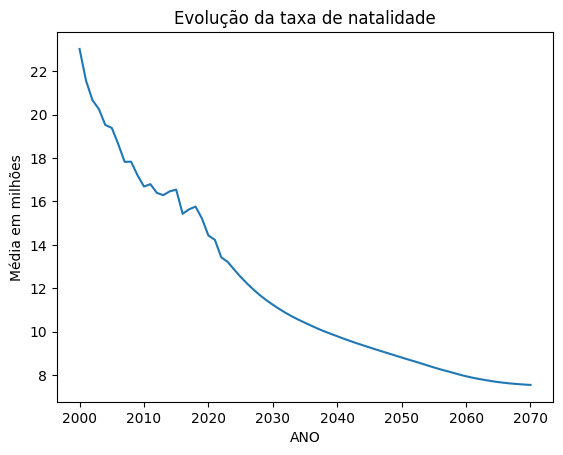

In [11]:
tx_natal.plot(kind="line", ylabel='Média em milhões', title='Evolução da taxa de natalidade')

<Axes: title={'center': 'Evolução da taxa de fecundidade'}, xlabel='ANO', ylabel='Média em milhões'>

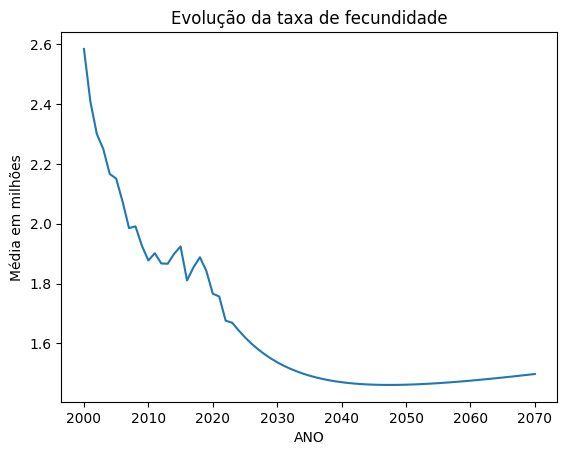

In [12]:
tx_fecundidade=fecundidade_est.groupby('ANO')['TX_FCUND_T'].mean()
tx_fecundidade.plot(kind="line", ylabel='Média em milhões', title='Evolução da taxa de fecundidade')

#Principais motivos para a diminuição da taxa de natalidade e de fecundidade no Brasil
1. Aumento da escolaridade (especialmente feminina).
  Mulheres com maior nível de instrução tendem a adiar a maternidade e ter menos filhos.

  Educação melhora o acesso à informação sobre saúde reprodutiva e planejamento familiar.

2. Maior participação das mulheres no mercado de trabalho.
  Com mais mulheres trabalhando fora, o custo de oportunidade de ter filhos aumenta.

  Muitas optam por adiar ou limitar o número de filhos para equilibrar vida profissional e pessoal.

3. Urbanização e mudanças no estilo de vida.
  Na cidade, o custo de criar filhos é maior (educação, moradia, saúde).  
  A vida urbana também favorece casais com menos filhos ou sem filhos.

4. Acesso a métodos contraceptivos.
  A maior disponibilidade e aceitação de métodos anticoncepcionais permite melhor controle sobre o número de filhos.

5. Atraso nos casamentos e no início da vida reprodutiva.
  Casamentos e relações duradouras estão ocorrendo mais tarde, encurtando o período fértil disponível para ter filhos.


 # Como a taxa de fecundidade varia por Estado no Brasil?
 ## Quais são os Estados com menor e maior taxa de fecundidade?

In [13]:
tx_fecundidade=fecundidade_est.groupby('LOCAL')['TX_FCUND_T'].mean()

In [14]:
tx_fecundidade=tx_fecundidade.sort_values(ascending=True)
tx_fecundidade = tx_fecundidade.drop('Brasil')
tx_fecundidade

,TX_FCUND_T
LOCAL,
Rio de Janeiro,1.494884
Rio Grande do Sul,1.517749
Minas Gerais,1.518225
Sudeste,1.520893
São Paulo,1.523664
...,...
Mato Grosso,1.824021
Amazonas,1.89301
Amapá,1.913258


<Axes: title={'center': 'Taxa de fecundidade por Estado no Brasil'}, xlabel='Taxa de fecundidade', ylabel='Estado'>

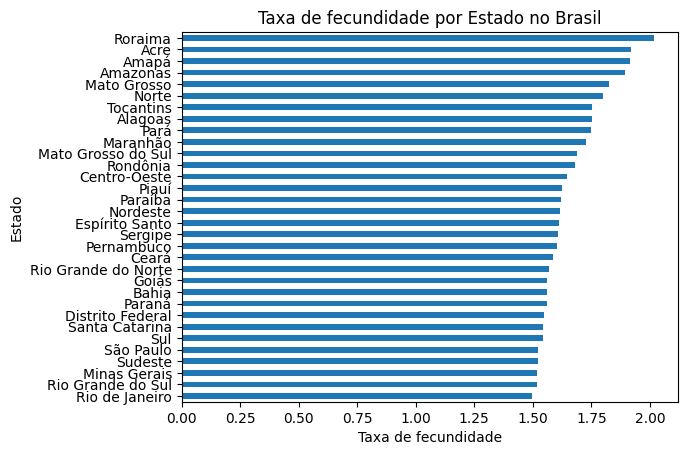

In [15]:
tx_fecundidade.plot(kind='barh', title='Taxa de fecundidade por Estado no Brasil', ylabel='Estado', xlabel='Taxa de fecundidade')

In [16]:
tx_media_brasil=fecundidade_est.get('TX_FCUND_T').mean()
print("A taxa de fecundidade total média no Brasil é de", tx_media_brasil);

A taxa de fecundidade total média no Brasil é de 1.6569936712686568


In [17]:
min_valor = tx_fecundidade.min()  # menor valor da taxa
estado_min = tx_fecundidade[tx_fecundidade == min_valor]  # linha(s) correspondente(s)
estado_min

,TX_FCUND_T
LOCAL,
Rio de Janeiro,1.494884


In [18]:
max_valor = tx_fecundidade.max()  # menor valor da taxa
estado_max = tx_fecundidade[tx_fecundidade == max_valor]  # linha(s) correspondente(s)
estado_max

,TX_FCUND_T
LOCAL,
Roraima,2.017738


A partir dessa análise pode-se concluir que os Estados no Norte possuem maior taxa de fecundidade em geral e os Estados do Sul e Sudeste possuem taxas menores. Além disso, sabemos que o Estado com maior taxa de fecundidade é Roraima e o Estado com menor taxa de fecundidade é o Rio de Janeiro.

##Motivos dos Estados do Norte terem maior taxa de fecundidade e os do Sul/Sudeste menor?
1. Desigualdades socioeconômicas:
Em regiões com menor renda, é comum que famílias tenham mais filhos, por fatores culturais e econômicos (em áreas rurais, por exemplo, filhos podem contribuir com o trabalho). Estados como São Paulo, Rio de Janeiro e Rio Grande do Sul possuem melhores indicadores educacionais, principalmente para mulheres — fator diretamente ligado à redução da fecundidade.

2. Educação e informação:
O acesso a informação sobre planejamento familiar e métodos contraceptivos é mais amplo nas regiões Sul e Sudeste. Mulheres com mais anos de escolaridade geralmente adiam a maternidade e têm menos filhos.

3. Cultura e valores tradicionais:
Em muitos locais do Norte, há maior valorização de famílias numerosas por razões culturais e religiosas. Em áreas urbanas e mais industrializadas (como RJ e SP), os valores culturais tendem a favorecer famílias menores.

4. Acesso a serviços de saúde:
A oferta de serviços públicos de saúde reprodutiva e planejamento familiar é mais ampla e eficaz nos Estados do Sul/Sudeste. No Norte, o acesso pode ser mais limitado, especialmente em áreas rurais ou isoladas da floresta amazônica.

5. Urbanização e custo de vida
O custo de vida mais elevado nas capitais do Sudeste desincentiva famílias grandes. No Norte, onde a urbanização é menor e a vida rural ainda é mais comum, esse fator tem menor peso.

##Vejamos:
Roraima (maior taxa): Menor grau de urbanização, menor escolaridade média, menor acesso a serviços de saúde e predominância de valores tradicionais.

Rio de Janeiro (menor taxa): Alta urbanização, maior escolaridade, custo de vida elevado e maior acesso à informação e saúde reprodutiva.

# Existe diferença entre a expectativa de vida dos homens e das mulheres?
## Houve algum periodo em que a expectavidade devida de ambos caiu drasticamente?

In [19]:
# Agrupar por ano e tirar a média da expectativa de vida para cada grupo
media_fem = indicadores_femininos.groupby('ANO')['ESP_VIDA_O_M'].mean()
media_masc = indicadores_masculinos.groupby('ANO')['ESP_VIDA_O_H'].mean()

# Calcular a diferença
diferenca = media_fem - media_masc
diferenca

,0
ANO,
2000,7.14244
2001,7.182417
2002,7.253937
2003,7.272207
2004,7.251254
...,...
2066,4.662932
2067,4.610104
2068,4.557368


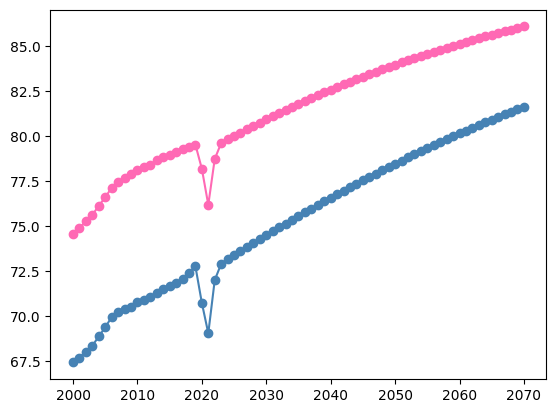

In [20]:
plt.plot(media_fem.index, media_fem.values, label='Mulheres', color='hotpink', marker='o')
plt.plot(media_masc.index, media_masc.values, label='Homens', color='steelblue', marker='o')

Concluimos que existe diferença entre a expectativa de vida dos homens e das mulheres e que a expectativa de vida das mulheres é, em média, maior que a dos homens.

Houve um período em que ambas cairam drasticamente, em 2020. Essa queda na expectativa de vida é um reflexo direto dos impactos da pandemia de COVID-19, que provocou um aumento na mortalidade por várias causas, tanto direta (infecção por coronavírus) quanto indireta (efeitos na saúde mental, interrupção de tratamentos e serviços de saúde). Isso evidencia os efeitos devastadores de uma crise sanitária global e seus efeitos colaterais nas condições de vida e saúde da população.

# Existe correlação entre Taxa de Crescimento Vegetativo e Expectativa de Vida no Brasil?

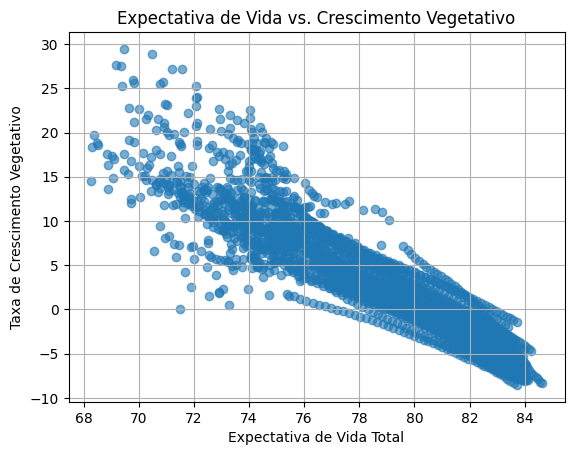

In [21]:
plt.scatter(dados['ESP_VIDA_O_T'], dados['TX_CRESC_VEGET'], alpha=0.6)
plt.title('Expectativa de Vida vs. Crescimento Vegetativo')
plt.xlabel('Expectativa de Vida Total')
plt.ylabel('Taxa de Crescimento Vegetativo')
plt.grid(True)
plt.show()

Com base na análise desses dados, pode-se afirmar que há uma correlação negativa entre a taxa de crescimento vegetativo e a expectativa de vida total no Brasil, principalmente devido a fatores regionais e socioeconômicas. Isso significa que quanto maior a taxa de crescimento vegetativo, menor a expectativa de vida.

# Qual a média de idade total e por Estado no Brasil?

In [22]:
med_idade_total=dados.get('MED_IDADE').mean()
print("A média de idade total no Brasil é de", med_idade_total, "anos")

A média de idade total no Brasil é de 38.17821934097961 anos


In [23]:
med_idade_estado=dados.groupby('LOCAL')['MED_IDADE'].mean()
med_idade_estado=med_idade_estado.drop('Brasil')
print(med_idade_estado)

LOCAL
Acre         35.105303
Alagoas      37.760402
Amapá        34.756839
Amazonas     34.562056
Bahia        39.523262
               ...    
Sergipe      38.593939
Sudeste      40.304998
Sul          39.914806
São Paulo    40.118168
Tocantins    37.173315
Name: MED_IDADE, Length: 32, dtype: object


In [24]:
minimo_idade=med_idade_estado.min()
med_idade_estado[med_idade_estado==minimo_idade]

,MED_IDADE
LOCAL,
Roraima,33.390891


In [25]:
maximo_idade=med_idade_estado.max()
med_idade_estado[med_idade_estado==maximo_idade]

,MED_IDADE
LOCAL,
Rio Grande do Sul,41.268029


O Estado com maior média de idade é o Rio Grande do Sul, cuja taxa de fecundidade é uma das menores do Brasil, e o Estado com menor média de idade é Roraima, que é o que possui maior taxa de fecundidade.

# Como a taxa de mortalidade infantil total varia por Estado no Brasil?
## Quais são os Estados com menor e maior taxa de mortalidade infantil total?

In [26]:
mortalidade_estado=dados.groupby('LOCAL')['TX_MORT_INFANTIL_T'].mean()
mortalidade_estado=mortalidade_estado.drop('Brasil')
mortalidade_estado=mortalidade_estado.sort_values(ascending=True)
print(mortalidade_estado)

LOCAL
Santa Catarina        8.221329
Rio Grande do Sul     8.602553
Sul                   8.759336
Distrito Federal      9.154455
Paraná                9.279289
                       ...    
Acre                 14.469145
Amazonas             14.515834
Sergipe              15.361641
Roraima              15.630303
Amapá                15.862313
Name: TX_MORT_INFANTIL_T, Length: 32, dtype: object


<Axes: title={'center': 'Taxa de mortalidade infantil por Estado no Brasil'}, xlabel='Taxa de mortalidade em milhões', ylabel='Estado'>

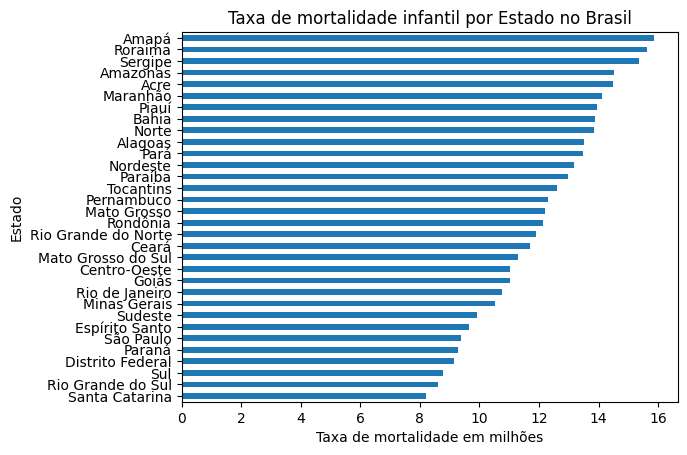

In [27]:
mortalidade_estado.plot(kind='barh', title='Taxa de mortalidade infantil por Estado no Brasil', xlabel='Taxa de mortalidade em milhões',
                        ylabel='Estado')

Os Estados do Norte possuem maior taxa de mortalidade infantil e os Estados do Sul e Sudeste possuem menor taxa de mortalidade infantil, o que podemos ver que se relaciona novamente às desigualdades sociais entre esses Estados brasileiros.

# PIB do Brasil - Variação ao longo dos anos

<Axes: >

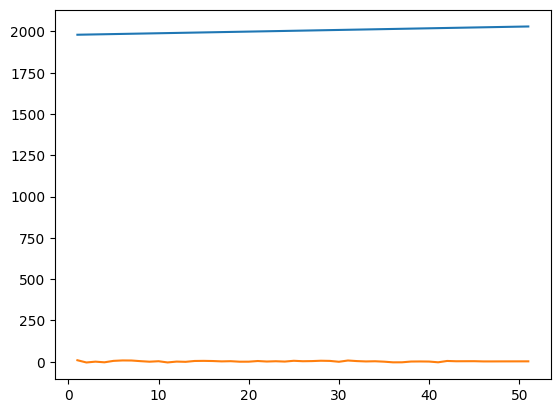

In [28]:
PIB.plot(kind='line', legend=False)

####PIB oscilando ou em queda: O PIB brasileiro tem mostrado variações significativas ao longo dos anos, especialmente em anos de crise econômica (como em 2015-2016 e 2020 com a pandemia).

# **Há uma relação entre indicadores de saúde (mortalidade, esperança de vida) e o PIB no Brasil?**

###A análise da relação entre indicadores de saúde — como a taxa de mortalidade e a esperança de vida ao nascer — e o crescimento econômico, representado pelo PIB per capita, é fundamental para compreender como o bem-estar populacional afeta o desenvolvimento socioeconômico de um país.

##Hipóteses:
Quanto maior a esperança de vida ao nascer, maior o PIB per capita (indicador relacionado ao crescimento econômico). E quanto menor a taxa de mortalidade, maior o PIB per capita.
*   Famílias e governos investem em saúde como forma de aumentar o bem-estar e a produtividade das pessoas.

A saúde da população está diretamente ligada à capacidade produtiva e ao desenvolvimento sustentável de uma nação. Uma população mais saudável é mais propensa a permanecer ativa por mais tempo, aumentar sua produtividade e contribuir de maneira mais efetiva para a economia.

Além disso, famílias e governos tendem a investir em saúde não apenas por motivos humanitários, mas também como uma estratégia de desenvolvimento econômico. A melhora nos indicadores de saúde reduz custos com doenças, aumenta a escolaridade (ao reduzir ausências escolares e déficits cognitivos associados a doenças infantis) e amplia a força de trabalho disponível e eficiente.


##Expectativas:


*  Uma correlação positiva entre esperança de vida e PIB per capita, indicando que conforme as condições de saúde melhoram, a economia tende a crescer.
*  Uma correlação negativa entre taxas de mortalidade e PIB per capita, sugerindo que ambientes com melhores condições sanitárias e médicas promovem maior desenvolvimento econômico.

# **Esperança de vida ao nascer e PIB per capita**

In [29]:
PIB_filtrado=PIB.loc[(PIB['Ano']>=2001) & (PIB['Ano']<=2014)]
PIB_filtrado

,Ano,Cresc_PIB
22,2001,1.4
23,2002,3.1
24,2003,1.1
25,2004,5.8
26,2005,3.2
...,...,...
31,2010,7.5
32,2011,4.0
33,2012,1.9
34,2013,3.0


In [30]:
#Dados da taxa de crescimento geométrico total da população (em %) (essencial pra calcular o PIB per capita)
dados_tx_crescimento=dados.loc[(dados.get('LOCAL')=='Brasil')&(dados.get('ANO')>=2001) & (dados.get('ANO')<=2014)].get('TX_CRES_GEOM_T')
dados_tx_crescimento

,TX_CRES_GEOM_T
2,1.321043
3,1.256759
4,1.199253
5,1.153361
6,1.116684
...,...
11,0.815479
12,0.723638
13,0.77081
14,0.78721


In [31]:
#Obtendo o PIB per capita
PIB_filtrado = PIB_filtrado.astype(float)
dados_tx_crescimento = dados_tx_crescimento.astype(float)

# Subtrair para obter o crescimento do PIB per capita
pib_per_capita = PIB_filtrado.get('Cresc_PIB').values - dados_tx_crescimento.values

pib_per_capita

array([ 0.07895724,  1.8432407 , -0.09925288,  4.64663907,  2.08331578,
        2.91295886,  5.07416659,  4.10961648, -1.06105685,  6.68452136,
        3.27636156,  1.12919009,  2.21279045, -0.29528948])

In [32]:
#Criando um Data Frame com os dados do PIB per capita
df_pib_per_capita = pd.DataFrame({
    'PIB_per_capita': pib_per_capita
})
df_pib_per_capita=df_pib_per_capita.set_index(np.arange(2001,2015))
df_pib_per_capita

,PIB_per_capita
2001,0.078957
2002,1.843241
2003,-0.099253
2004,4.646639
2005,2.083316
...,...
2010,6.684521
2011,3.276362
2012,1.129190
2013,2.212790


In [33]:
esp_vida_anos=mortalidade_est.groupby('ANO')['ESP_VIDA_O_T'].mean()
esp_vida_filtrado = esp_vida_anos.loc[(esp_vida_anos.index >= 2001) & (esp_vida_anos.index <= 2014)]
esp_vida_filtrado

,ESP_VIDA_O_T
ANO,
2001,71.144714
2002,71.516571
2003,71.85285
2004,72.362471
2005,72.862216
...,...
2010,74.333573
2011,74.477908
2012,74.657142


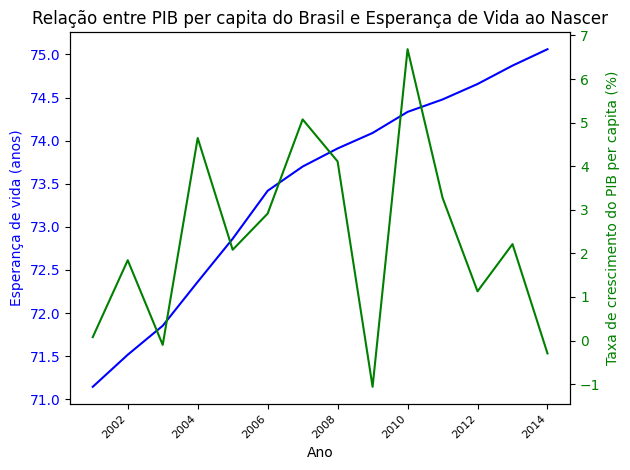

In [34]:
#Criando um gráfico de linha que mostra a variação do PIB e da esperança de vida ao nascer no Brasil

fig, ax1 = plt.subplots()

# Plotar a esperança de vida no eixo Y primário (à esquerda)
ax1.plot(esp_vida_filtrado.index, esp_vida_filtrado.values, color='blue', label='Esperança de vida')
ax1.set_ylabel('Esperança de vida (anos)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Criar o eixo Y secundário (à direita)
ax2 = ax1.twinx()
ax2.plot(df_pib_per_capita.index, df_pib_per_capita.values, color='green', label='PIB')
ax2.set_ylabel('Taxa de crescimento do PIB per capita (%)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Título e eixo X
plt.title('Relação entre PIB per capita do Brasil e Esperança de Vida ao Nascer')
ax1.set_xlabel('Ano')

# Ajustar diretamente os ticks do eixo X
for label in ax1.get_xticklabels():
    label.set_fontsize(8)      # Tamanho da fonte menor
    label.set_rotation(45)     # Gira os anos
    label.set_ha('right')      # Alinha à direita

plt.tight_layout()
plt.show()

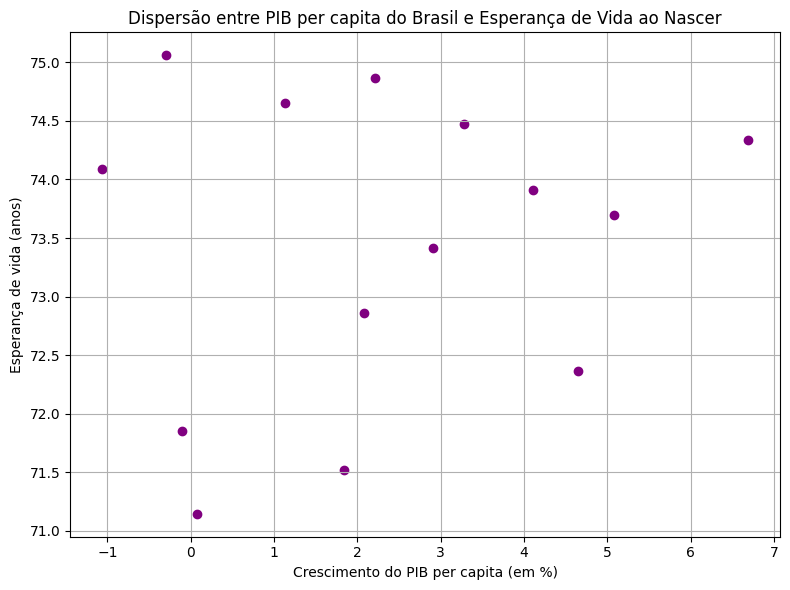

In [35]:
# Gráfico de dispersão entre PIB e esperança de vida ao nascer

plt.figure(figsize=(8, 6))
plt.scatter(df_pib_per_capita.values, esp_vida_filtrado.values, color='purple')

# Rótulos e título
plt.xlabel('Crescimento do PIB per capita (em %)')
plt.ylabel('Esperança de vida (anos)')
plt.title('Dispersão entre PIB per capita do Brasil e Esperança de Vida ao Nascer')

plt.grid(True)
plt.tight_layout()
plt.show()


### Há baixa correlação entre as variáveis, uma vez que os pontos estão muito espalhados e não formam uma nuvem inclinada consistentemente para cima. Isso contradiz nossa hipótese de que haveria uma correlação forte e positiva entre elas.


###A relação entre PIB per capita e expectativa de vida no Brasil não é linear nem direta. A baixa correlação observada indica que, embora o crescimento econômico possa ter um impacto positivo na qualidade de vida e no aumento da expectativa de vida, outros fatores, como acesso a cuidados médicos, políticas públicas de saúde e desigualdade social, desempenham papéis fundamentais.

###Podemos concluir que a expectativa de vida é influenciada por uma série de fatores sociais, sanitários, ambientais e políticos, e não depende exclusivamente do crescimento econômico. Pode acontecer de a esperança de vida aumentar mesmo com queda no PIB per capita, como observamos.

###Já em relação ao PIB, que é uma variável econômica complexa, também não se pode atribuir sua oscilação apenas à saúde ou bem-estar da população, da mesma forma que o bem-estar não depende exclusivamente do crescimento econômico.

#**Taxa de Mortalidade Bruta e PIB per capita**

In [36]:
mortalidade=indices_populacionais.groupby('ANO')['TXB_MORTALID'].mean()


In [37]:
mortalidade_filtrado = mortalidade.loc[(mortalidade.index >= 2001) & (mortalidade.index <= 2014)]
mortalidade_filtrado

,TXB_MORTALID
ANO,
2001,6.0571
2002,5.980399
2003,5.925032
2004,5.812549
2005,5.715427
...,...
2010,5.686432
2011,5.73899
2012,5.781749


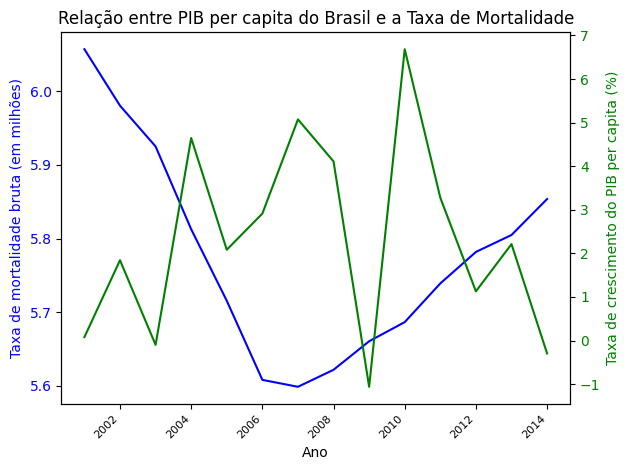

In [38]:
#Criando um gráfico de linha que mostra a variação do PIB e da taxa de mortalidade bruta no Brasil
fig, ax1 = plt.subplots()

# Plotar a taxa de mortalidade no eixo Y primário (à esquerda)
ax1.plot(mortalidade_filtrado.index, mortalidade_filtrado.values, color='blue', label='Esperança de vida')
ax1.set_ylabel('Taxa de mortalidade bruta (em milhões)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Criar o eixo Y secundário (à direita)
ax2 = ax1.twinx()
ax2.plot(df_pib_per_capita.index, df_pib_per_capita.values, color='green', label='PIB')
ax2.set_ylabel('Taxa de crescimento do PIB per capita (%)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Título e eixo X
plt.title('Relação entre PIB per capita do Brasil e a Taxa de Mortalidade')
ax1.set_xlabel('Ano')

# Ajustar diretamente os ticks do eixo X
for label in ax1.get_xticklabels():
    label.set_fontsize(8)      # Tamanho da fonte menor
    label.set_rotation(45)     # Gira os anos
    label.set_ha('right')      # Alinha à direita

plt.tight_layout()
plt.show()

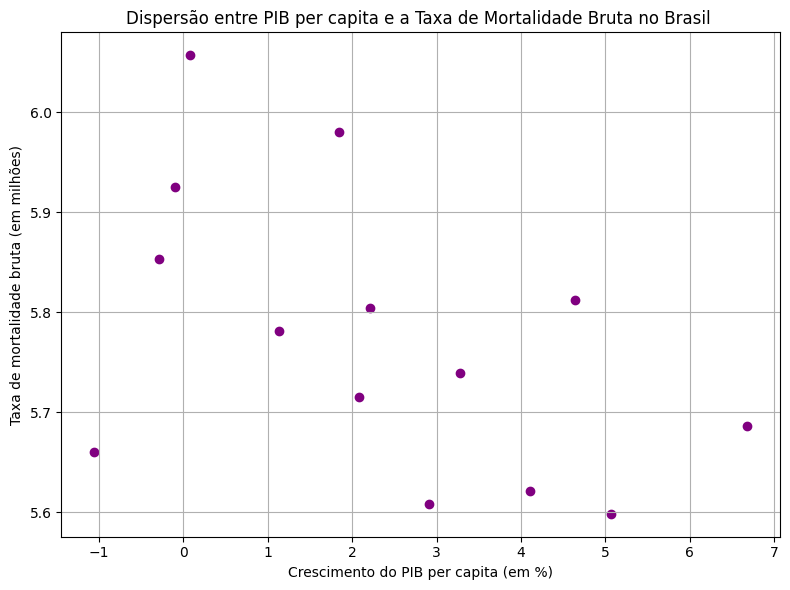

In [39]:
# Gráfico de dispersão
plt.figure(figsize=(8, 6))
plt.scatter(df_pib_per_capita.values, mortalidade_filtrado.values, color='purple')

# Rótulos e título
plt.xlabel('Crescimento do PIB per capita (em %)')
plt.ylabel('Taxa de mortalidade bruta (em milhões)')
plt.title('Dispersão entre PIB per capita e a Taxa de Mortalidade Bruta no Brasil ')

plt.grid(True)
plt.tight_layout()
plt.show()

### Observa-se uma baixa correlação entre as variáveis analisadas. Os pontos do gráfico estão bastante dispersos e não formam uma nuvem de pontos com inclinação claramente negativa, como sugerido inicialmente pela hipótese. No entanto, é possível identificar uma leve tendência de correlação negativa, ainda que fraca, indicando que, em geral, quanto maior uma variável, menor tende a ser a outra

####De modo geral, percebe-se que, à medida que o PIB per capita cresce, a taxa de mortalidade tende a diminuir. Essa tendência está associada ao progresso econômico, que frequentemente vem acompanhado de melhorias nos serviços de saúde, alimentação, saneamento e qualidade de vida. Contudo, a relação não é perfeitamente linear: há anos em que o PIB per capita oscila (por exemplo, durante crises econômicas), mas a taxa de mortalidade não segue o mesmo padrão imediatamente.

# **Como o crescimento do PIB se relaciona com a intenção de consumo?**


In [50]:
# Funções importantes para a análise:

def padronizar(numeros):
    #Converte valores para unidades padrão. Será necessário para o cálculo do coeficiente de correlação de Pearson (r)
    return (numeros - numeros.mean()) / np.std(numeros)

def calcular_r(df,x,y):
    #Retorna o valor do r
    x_su = padronizar(df.get(x))
    y_su = padronizar(df.get(y))
    return (x_su * y_su).mean()

def inclinacao(df, x, y):
    #Retorna a inclinação da linha de regressão entre as colunas x e y do dataframe (em unidades originais)
    r = calcular_r(df, x, y)
    return r * np.std(df.get(y)) / np.std(df.get(x))

def intercepto(df, x, y):
    #Retorna o intercepto da linha de regressão entre as colunas x e y do dataframe (em unidades originais)
    return df.get(y).mean() - inclinacao(df, x, y) * df.get(x).mean()

def valor_predito(x):
    #Retorna o valor predito para um determinado ponto x do gráfico
    return a*x+b

def plotar_erro(df, x_col, y_col):
    # Calcula coeficientes da regressão
    a = inclinacao(df, x_col, y_col)
    b = intercepto(df, x_col, y_col)

    # Valores reais
    x = df.get(x_col)
    y = df.get(y_col)

    # Valores preditos
    y_pred = a * x + b

    # Cria o gráfico
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, color='blue', label='Valores reais')
    plt.plot(x, y_pred, color='red', label='Reta de regressão')

    # Erros (resíduos)
    for xi, yi, ypi in zip(x, y, y_pred):
        plt.plot([xi, xi], [yi, ypi], color='gray', linestyle='--')

    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(f'Erros em relação à reta de regressão: {y_col} vs {x_col}')
    plt.legend()
    plt.grid(True)
    plt.show()

A análise da influência do crescimento da atividade econômica sobre a intenção de consumo das famílias, empiricamente, parece fazer sentido, dado que uma economia aquecida, geralmente, acompanha a expansão do mercado consumidor interno. Com essa perspectiva, podemos intuir algumas hipóteses:


##Hipóteses:

Historicamente, segundo análise de cientistas políticos, os governos brasileiros tendem a estimular o crescimento econômico aumentando o incentivo ao consumo - isto pode se dar por meio de programas de transferência de renda ou políticas de valorização da remuneração, como o aumento do salário mínimo acima da inflação - ao custo da agenda fiscal. Sob esse viés, fazemos as seguintes suposições:
*   O indicador econômico Consumo das Famílias é positivamente influenciado pela adoção de medidas governamentais
*   A série histórica (normalizada com relação a 2022) de Intenção de Consumo, de caráter potencial, se reflete significativamente em caráter real, isto é, é um mecanismo confiável, que antevê padrões quantitativos de consumo da população.

##Expectativas:


*  Há correlação positiva e forte entre os indicadores `Crescimento do PIB` e `Intenção de Consumo`, o que fortaleceria a ideia de que **o aquecimento da atividade econômica no país é explicado, em grande parte, por uma tradução da perspectiva de consumo das famílias em consumo real**.

##Contextualizando

Eis a série histórica do crescimento anual percentual do Produto Interno Bruto (PIB) brasileiro junto da Intenção de Consumo das famílias, com suas respectivas escalas. O recorte temporal abrange eventos importantes na história econômica nacional, como a Crise do biênio 2015-2016 e a Pandemia de COVID-19 (2020-2022) - intervalos destacados em amarelo no gráfico -, ambos com ligeiro impacto na atividade econômica, no poder de compra do brasileiro médio e em suas perspectivas de consumo.

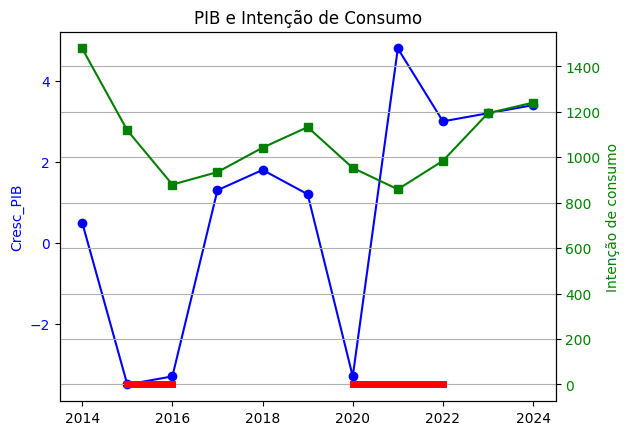

In [51]:
# Eventos de destaque
Crise_Nacional=[2015,2016]
Pandemia_COVID=[2020,2022]
Eventos=[Crise_Nacional,Pandemia_COVID]

PIB_Consumo=PIB.merge(
    dados_intencao_consumo,
    on='Ano'
)
PIB_Consumo=PIB_Consumo.set_index('Ano')

# Criar a figura e o primeiro eixo
fig, ax1 = plt.subplots()

# Plotar a primeira série no eixo Y da esquerda
ax1.plot(PIB_Consumo.index, PIB_Consumo['Cresc_PIB'], color='blue', marker='o', label='Vendas')
ax1.set_ylabel('Cresc_PIB', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Criar o segundo eixo Y (à direita)
ax2 = ax1.twinx()
ax2.plot(PIB_Consumo.index, PIB_Consumo['Intenção de consumo'], color='green', marker='s', label='Lucro')
ax2.set_ylabel('Intenção de consumo', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Título e layout
plt.title('PIB e Intenção de Consumo')
for i in Eventos:
    plt.plot(i, [0, 0], color='red', linewidth=5, zorder=2);
plt.grid(True)
plt.show()

`Análise:` Visualmente, podemos verificar que as curvas de intenção de consumo e crescimento do PIB aparentam ser influenciadas - ainda que em graus distintos - pelas mesmas variáveis. Sob esse prisma, observamos uma tendência interessante no gráfico: **o desempenho percentual negativo da economia sempre ocorre junto de redução nas expectativas de consumo das famílias**. Isso pode estar relacionado a como a sensação de piora econômica acarreta limitação nas perspectivas de consumo futuro.

Ademais, pode-se observar que, diferentemente do que se viu durante a crise econômica de 2015-16, *a intenção de consumo permaneceu em trajetória descendente em 2021, ainda que a atividade econômica tenha apresentado melhora considerável* - expansão de 4,8%, o melhor desempenho desde 2010 (7,5%), quando o país se recuperava da Crise Imobiliária Internacional de 2008.

A nuance comportamental desse indicador econômico pode ser explicada pelas particularidades do período vivido no momento mais recente. Ao contrário da crise anterior, movida pelo fracasso da política econômica doméstica, esta tinha causa totalmente externa a alguma eventual falha dos mecanismos de regulação dos ciclos econômicos, e foi respondida pelo governo com extensos pacotes de estímulo - a exemplo do auxílio emergencial. O impacto de tal medida é amplo, mas pode ser considerado na inflação, que atingiu um máximo em 2021, e pode ter sido uma das causas relevantes para que a confiança das famílias no consumo futuro fosse prejudicada.

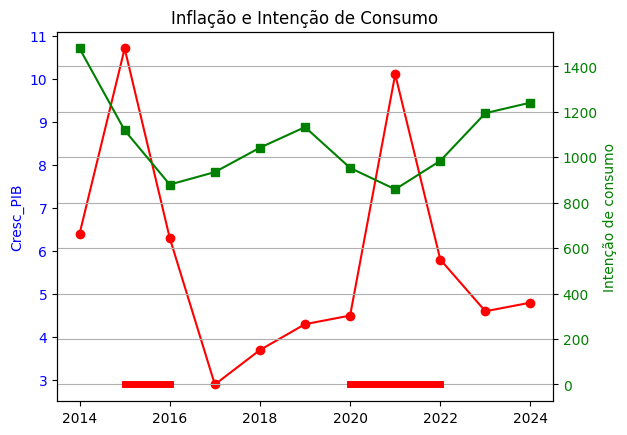

In [68]:
Inflacao_Consumo=Inflacao.merge(
    dados_intencao_consumo,
    on='Ano'
)
Inflacao_Consumo=Inflacao_Consumo.set_index('Ano')

# Criar a figura e o primeiro eixo
fig, ax1 = plt.subplots()

# Plotar a primeira série no eixo Y da esquerda
ax1.plot(Inflacao_Consumo.index, Inflacao_Consumo['Inflação (%)'], color='red', marker='o', label='Vendas')
ax1.set_ylabel('Cresc_PIB', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Criar o segundo eixo Y (à direita)
ax2 = ax1.twinx()
ax2.plot(Inflacao_Consumo.index, Inflacao_Consumo['Intenção de consumo'], color='green', marker='s', label='Lucro')
ax2.set_ylabel('Intenção de consumo', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Título e layout
plt.title('Inflação e Intenção de Consumo')
for i in Eventos:
    plt.plot(i, [0, 0], color='red', linewidth=5, zorder=2);
plt.grid(True)
plt.show()

Acima, visualizamos como 2021 foi um ano marcado por inflação próxima de dois dígitos, ao mesmo tempo em que as expectivas de consumo atingiram seu menor valor na série temporal analisada. Essa percepção nos obriga a reformular a hipótese de que o crescimento do PIB por si só seja capaz de ditar o consumo das famílias ou vice-versa. Desse modo, é possível que haja outros fatores importantes envolvidos, de tal maneira que a correlação entre expansão da atividade econômica e a intenção de consumo da população não seja forte o bastante para se supor causalidade.

Feitas as análises empíricas, podemos verificar se a hipótese corrobora com a configuração dos dados através de um gráfico de dispersão:

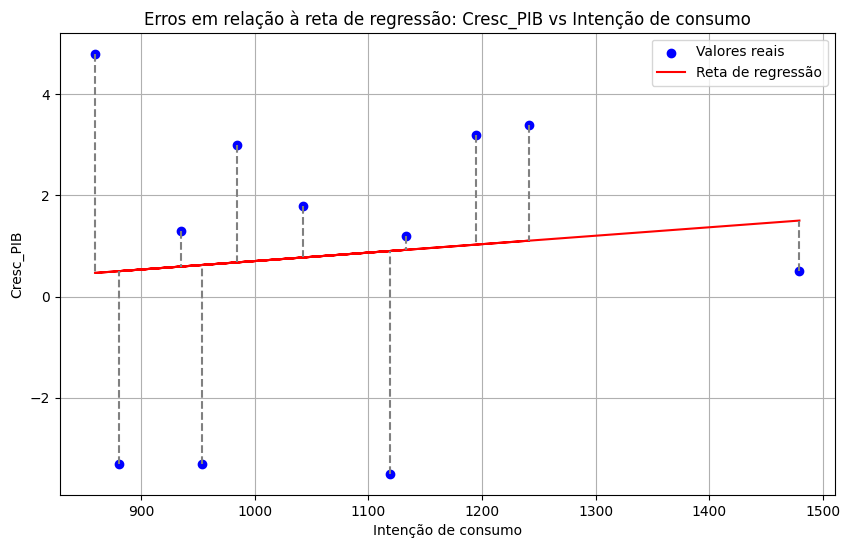

In [70]:
plotar_erro(PIB_Consumo,'Intenção de consumo','Cresc_PIB')

Intuitivamente, nota-se como a inclinação da reta de regressão, com os valores esperados da interação entre os dois indicadores, é próxima de 0, com erros notáveis entre a reta e quase todos os dados reais. Isso indica que a dita correlação, conforme esperávamos, não é significante. Para confirmar tal observação, calcula-se o coeficiente de Pearson:

In [72]:
coef_r=float(calcular_r(PIB_Consumo,'Intenção de consumo','Cresc_PIB'))
coef_r

0.10419626589518947

Com um r de ~0,104, podemos confirmar que a correlação entre os indicadores `Crescimento do PIB` e `Intenção de Consumo` é fraca ou inexistente (<0,3). O resultado corrobora a ideia de que o crescimento da economia, por si só, não é capaz de explicar as variações nas perspectivas de consumo do cidadão médio brasileiro.

**Conclusão**

Diante disso, poderíamos supor que a quase inexistente correlação se deve a um panorama em que o crescimento econômico não é distribuído de forma homogênea na população brasileira, ideia defendida por diversos economistas e cientistas políticos, entre eles, Marcio Porchmann (Unicamp).

#**PIB Per Capita e Intenção de Consumo**

Dado que constatamos que o crescimento percentual do PIB não é capaz de explicar, de maneira considerável, a intenção de consumo das famílias, intuimos que a distribuição da riqueza gerada no país é heterogênea, possivelmente se concentrando em camadas mais abastadas, o que poderia justificar a baixa correlação entre expansão econômica e previsões de consumo de curto e médio prazo.
Sob esse pensamento, surge outro questionamento: *O PIB Per Capita explica períodos de maior e menor intenção de consumo da população?*

Tal indagação se fundamenta no fato de que, diferentemente do crescimento percentual do PIB nacional, o PIB Per Capita carrega informações mais precisas e robustas sobre a produção de riqueza a nível individual, o que nos permite averiguar o quão rica é a população de um país. Desse modo, podemos nos perguntar se, quanto maior a riqueza média do brasileiro, maior será sua intenção em consumir.
Abaixo, temos um gráfico com o PIB Per Capita (em dólares internacionais) e o índice de Intenção de Consumo, cada variável em sua respectiva escala.

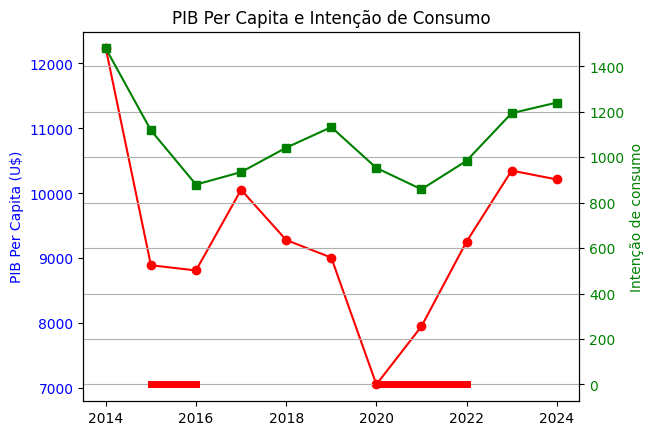

In [84]:
PC_Consumo=PIB_PC.merge(
    dados_intencao_consumo,
    on='Ano'
)
PC_Consumo=PC_Consumo.set_index('Ano')

# Criar a figura e o primeiro eixo
fig, ax1 = plt.subplots()

# Plotar a primeira série no eixo Y da esquerda
ax1.plot(PC_Consumo.index, PC_Consumo['PIB Per Capita (U$)'], color='red', marker='o', label='Vendas')
ax1.set_ylabel('PIB Per Capita (U$)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Criar o segundo eixo Y (à direita)
ax2 = ax1.twinx()
ax2.plot(PC_Consumo.index, PC_Consumo['Intenção de consumo'], color='green', marker='s', label='Lucro')
ax2.set_ylabel('Intenção de consumo', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Título e layout
plt.title('PIB Per Capita e Intenção de Consumo')
for i in Eventos:
    plt.plot(i, [0, 0], color='red', linewidth=5, zorder=2);
plt.grid(True)
plt.show()

Podemos visualizar uma proximidade comportamental maior entre os dois indicadores.

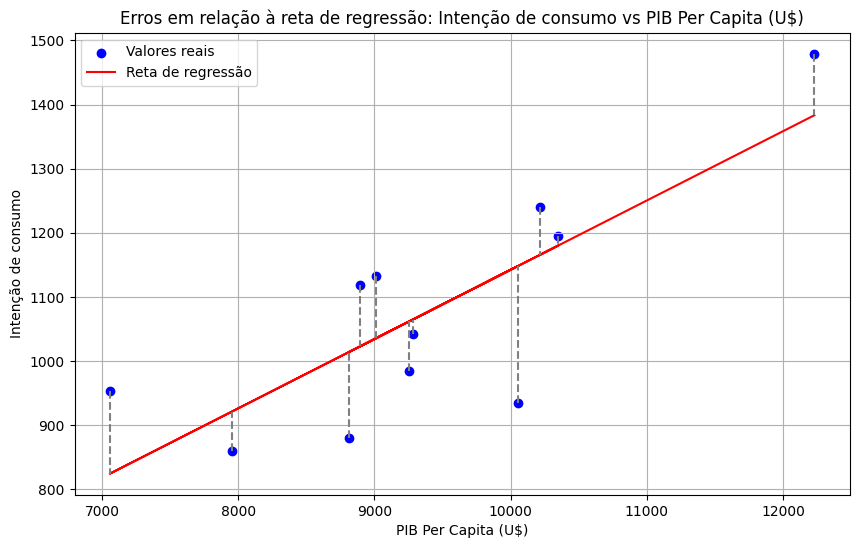

In [85]:
plotar_erro(PC_Consumo,'PIB Per Capita (U$)','Intenção de consumo')

In [86]:
coef_r=float(calcular_r(PC_Consumo,'PIB Per Capita (U$)','Intenção de consumo'))
coef_r

0.795738986100699